In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

In [23]:
# Load Netflix dataset
df = pd.read_csv("Netflix_dataset.csv")

# Preview
print(df.shape)
df.head()

(7789, 11)


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [24]:
# Overview of columns and types
df.info()

# Check missing values
print(df.isnull().sum())

# Unique values per column
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


Show_Id         7787
Category           2
Title           7787
Director        4050
Cast            6831
Country          681
Release_Date    1565
Rating            14
Duration         216
Type             492
Description     7769
dtype: int64

In [25]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Rating'] = df['Rating'].fillna('Unknown')
df['Release_Date'] = df['Release_Date'].ffill()

In [26]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year and month
df['year_added'] = df['Release_Date'].dt.year
df['month_added'] = df['Release_Date'].dt.month

# For safety, drop rows with completely missing years if any
df.dropna(subset=['year_added'], inplace=True)

In [27]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 7699 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7699 non-null   object        
 1   Category      7699 non-null   object        
 2   Title         7699 non-null   object        
 3   Director      7699 non-null   object        
 4   Cast          7699 non-null   object        
 5   Country       7699 non-null   object        
 6   Release_Date  7699 non-null   datetime64[ns]
 7   Rating        7699 non-null   object        
 8   Duration      7699 non-null   object        
 9   Type          7699 non-null   object        
 10  Description   7699 non-null   object        
 11  year_added    7699 non-null   float64       
 12  month_added   7699 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 842.1+ KB
Show_Id         0
Category        0
Title           0
Director        0
Ca

In [28]:
# Split genres
df['genre_list'] = df['Type'].apply(lambda x: [i.strip() for i in x.split(',')])

# Extract duration (minutes or seasons)
def extract_duration(x):
    try:
        if 'Season' in x:
            return int(x.split()[0]), 'TV Show'
        else:
            return int(x.split()[0]), 'Movie'
    except:
        return np.nan, 'Unknown'

df[['duration_value', 'duration_type']] = df['Duration'].apply(lambda x: pd.Series(extract_duration(x)))

In [29]:
df.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  year_added  month_added  \
0  In a future where the elite inhabit an island ...      2020.0          8.0   
1  After a devastating earthquake hits Mexico Cit...      2016.0         12.0   
2  When an army recruit is found dead, his fellow...      2018.0         12.0   
3  In a postapocalyptic world, rag-doll robots hi...      2017.0         11.0   
4  A brilliant group of students become card-coun...      2020.0          1.0   

                                          genre_list  duration_value  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               4   
1                     [Dramas, International Movies]              93   
2              [Horror Movies, International Movies]              78   
3  [Action & Adventure, Independent Movies, Sci-F...              80   
4                                           [Dramas]             123   

  duration_type  
0       TV Show  
1         Movie  
2         Movie  
3         Movie  
4         Movie

/tmp/ipython-input-341817564.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


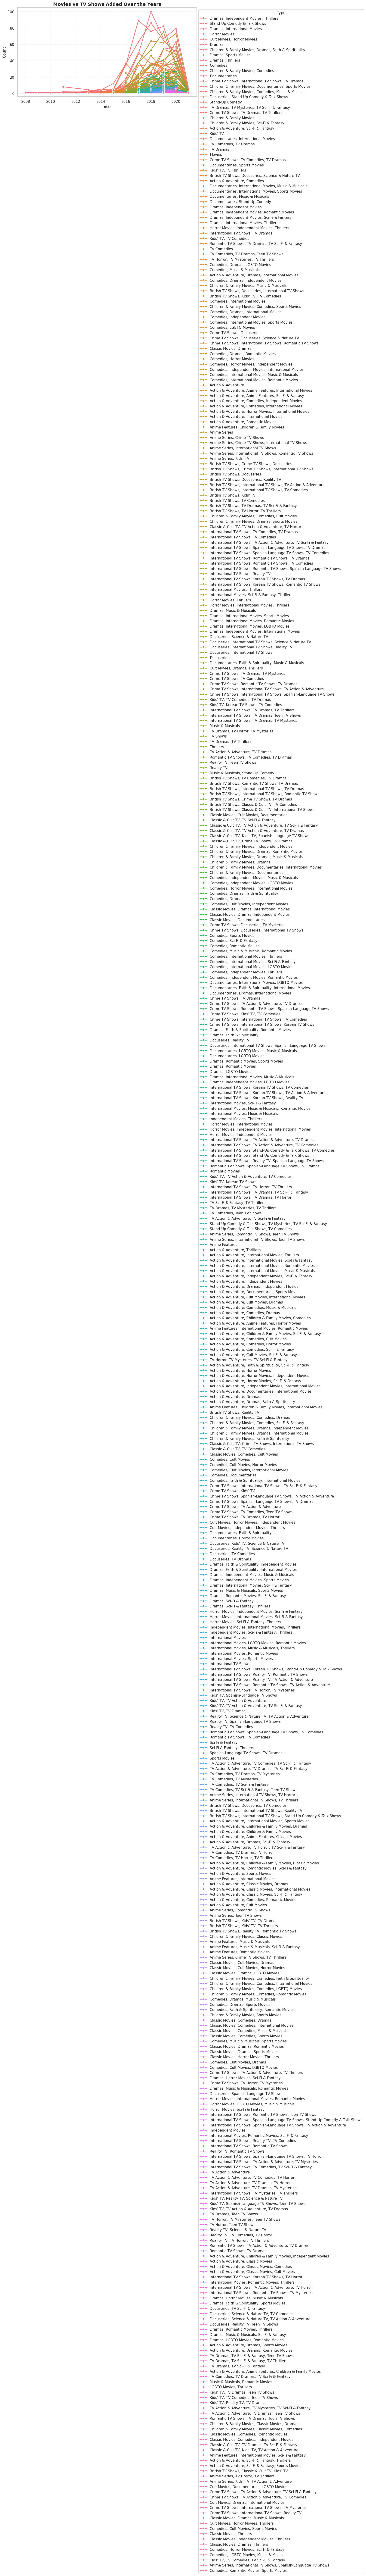

In [30]:
type_trend = (
    df.groupby(['year_added', 'Type'])
      .size()
      .reset_index(name='count')
      .sort_values('year_added')
)

plt.figure(figsize=(10,5))
sns.lineplot(data=type_trend, x='year_added', y='count', hue='Type', marker='o', linewidth=2)

plt.title("Movies vs TV Shows Added Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Type", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2222691173.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


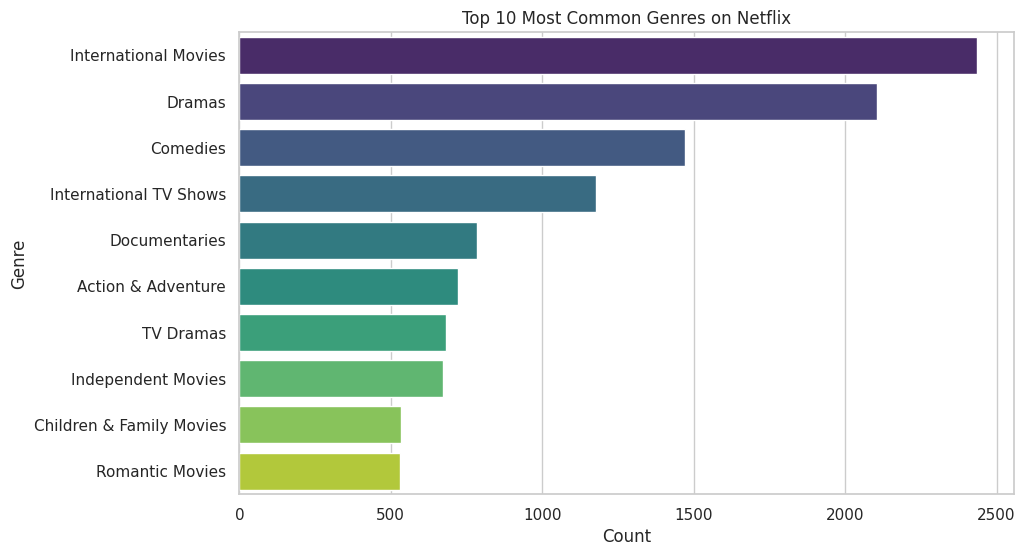

In [31]:
# Explode genre_list to count individually
genre_exploded = df.explode('genre_list')

top_genres = genre_exploded['genre_list'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

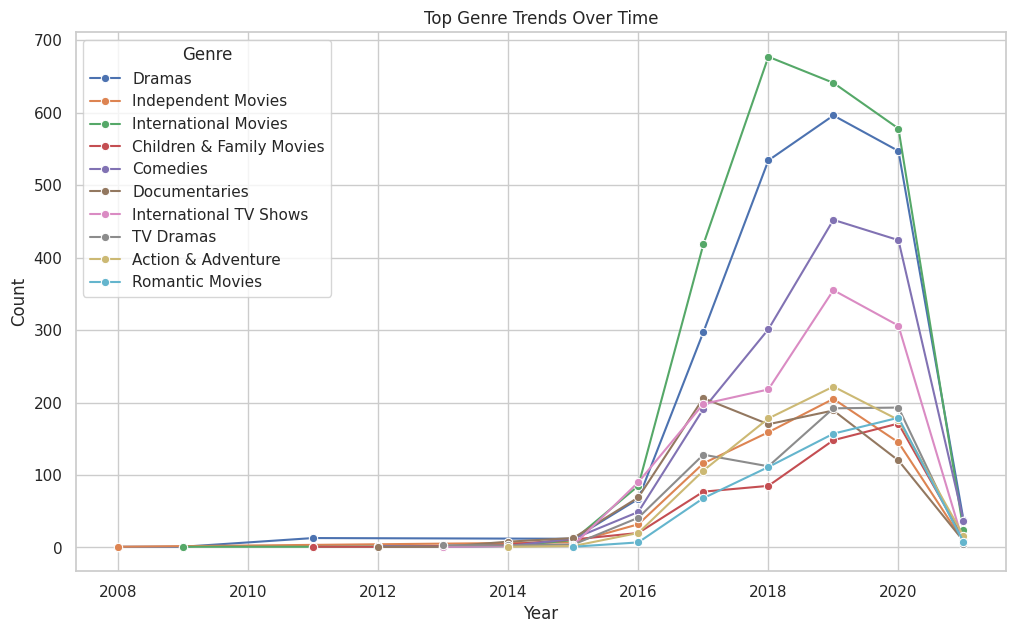

In [32]:
# Extract top genres again
top_genres_list = top_genres.index.tolist()

genre_trend = (genre_exploded[genre_exploded['genre_list'].isin(top_genres_list)]
               .groupby(['year_added', 'genre_list'])
               .size()
               .reset_index(name='count'))

plt.figure(figsize=(12,7))
sns.lineplot(data=genre_trend, x='year_added', y='count', hue='genre_list', marker='o')
plt.title("Top Genre Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()

/tmp/ipython-input-2604679595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='crest')


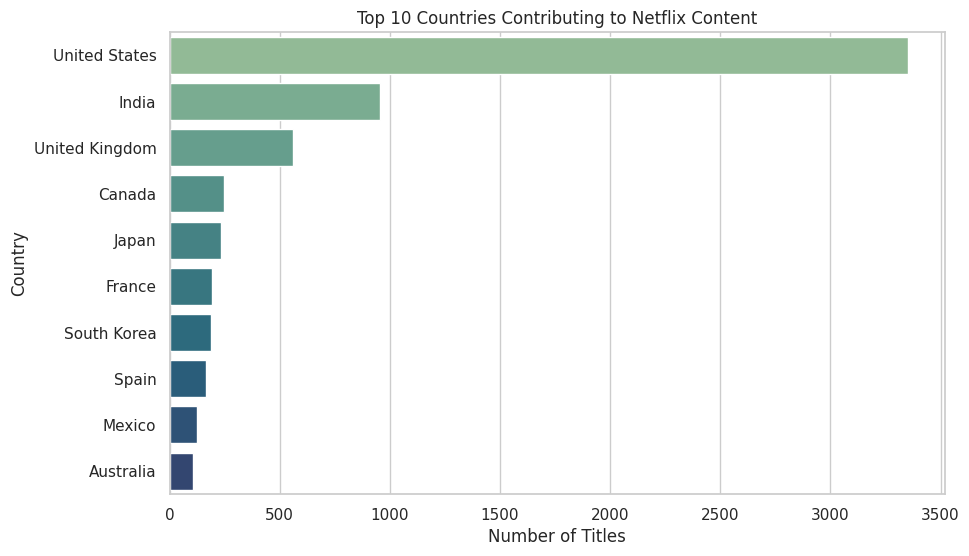

In [33]:
# Count number of titles per country (taking first country listed)
df['main_country'] = df['Country'].apply(lambda x: x.split(',')[0].strip())

top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='crest')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [34]:
df.to_csv("netflix_cleaned.csv", index=False)